# 1) Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import sqrt  

from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# 2) Reusable Functions

## 2.1) Calculating Nearest Distance to Amenties

In [2]:
def calculateNearestDistance(originLat, originLong, mall,mrt,school):
    shortestMallDist=99999
    shortestMrtDist=99999
    shortestSchDist=99999
# mall
    for index, row in mall.iterrows(): 
        mallDist=sqrt((originLat-row["latitude"])**2 +(originLong-row["longitude"])**2)*100000
        if mallDist<shortestMallDist:
            shortestMallDist=mallDist
# mrt
    for index, row in mrt.iterrows(): 
#         print(row['latitude'],row['longitude'])
        mrtDist=sqrt((originLat-row["latitude"])**2 +(originLong-row["longitude"])**2)*100000
        if mrtDist<shortestMrtDist:
            shortestMrtDist=mrtDist
# school
    for index, row in school.iterrows(): 
#         print(row['latitude'],row['longitude'])
        schDist=sqrt((originLat-row["latitude"])**2 +(originLong-row["longitude"])**2)*100000
        if schDist<shortestSchDist:
            shortestSchDist=schDist
    return shortestMallDist,shortestMrtDist,shortestSchDist

## 2.2) Regression Models

In [2]:
def linear_model(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    lr_model = linear_model.LinearRegression()
    lr_model.fit(x_train, y_train)
    y_prediction = lr_model.predict(x_test)
    mse = metrics.mean_squared_error(y_test, y_prediction)
    return mse

In [3]:
def sgd_lasso(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1]
    lasso_list = [linear_model.SGDRegressor(alpha = alpha[i], max_iter = 10000, penalty='l1', random_state=424) for i in range(len(alpha))]
    lasso_mse_dict = {}
    for i in range(len(alpha)):
        lasso_model = lasso_list[i]
        lasso_model.fit(x_train, y_train)
        y_prediction = lasso_model.predict(x_test)
        mse_score = metrics.mean_squared_error(y_test, y_prediction)
        lasso_mse_dict[alpha[i]]=mse_score
    return lasso_mse_dict

In [4]:
def sgd_ridge(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    #feel free to change alpha here
    alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1]
    ridge_list = [linear_model.SGDRegressor(alpha = alpha[i], max_iter = 10000, penalty='l2', random_state=424) for i in range(len(alpha))]
    ridge_mse_dict = {}
    for i in range(len(alpha)):
        ridge_model = ridge_list[i]
        ridge_model.fit(x_train, y_train)
        y_prediction = ridge_model.predict(x_test)
        mse_score= metrics.mean_squared_error(y_test, y_prediction)
        ridge_mse_dict[alpha[i]]= mse_score
    return ridge_mse_dict

In [5]:
def KNeighbors_model(x_train, x_test, y_train, y_test):
  from sklearn.neighbors import KNeighborsRegressor
  neigh = KNeighborsRegressor()
  neigh.fit(x_train,y_train)
  y_prediction = neigh.predict(x_test)
  mse_score = metrics.mean_squared_error(y_test, y_prediction)
  return mse_score

In [6]:
def decisiontree_model(x_train, x_test, y_train, y_test):
  from sklearn.tree import DecisionTreeRegressor
  dt_model = DecisionTreeRegressor(random_state=424)
  dt_model.fit(x_train, y_train)
  y_prediction = dt_model.predict(x_test)
  mse_score = metrics.mean_squared_error(y_test, y_prediction)
  return mse_score

In [7]:
def sgd_elasticnet(x_train, x_test, y_train, y_test):
    from sklearn import linear_model
    #feel free to change alpha here
    alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1]
    elasticnet_list = [linear_model.SGDRegressor(alpha = alpha[i], max_iter = 10000, penalty='elasticnet', l1_ratio=0.5, random_state=424) for i in range(len(alpha))]
    elasticnet_mse_dict = {}
    for i in range(len(alpha)):
        elasticnet_model = elasticnet_list[i]
        elasticnet_model.fit(x_train, y_train)
        y_prediction = elasticnet_model.predict(x_test)
        mse_score= metrics.mean_squared_error(y_test, y_prediction)
        elasticnet_mse_dict[alpha[i]]= mse_score
    return elasticnet_mse_dict

## 2.3) Ensembles

In [8]:
def ada_model(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import AdaBoostRegressor
    ada = AdaBoostRegressor(random_state=424)
    ada.fit(x_train, y_train)
    y_pred_ada = ada.predict(x_test)
    ada_mse = metrics.mean_squared_error(y_test, y_pred_ada)
    return ada_mse

In [9]:
def xgboost_model(x_train,x_test,y_train,y_test):
    import xgboost
    xgb_model = xgboost.XGBRegressor(random_state=424)
    xgb_model.fit(x_train, y_train)
    xgb_ypred = xgb_model.predict(x_test)
    xgb_mse = metrics.mean_squared_error(y_test, xgb_ypred)
    return xgb_mse

In [10]:
def randomforest_model(x_train,x_test,y_train,y_test):
    from sklearn.ensemble import RandomForestRegressor
    rf_model = RandomForestRegressor(random_state=424)
    rf_model.fit(x_train,y_train)
    rf_pred = rf_model.predict(x_test)
    rf_mse = metrics.mean_squared_error(y_test, rf_pred)
    return rf_mse

# 3) Importing Datasets

In [11]:
#Original data
housing_df = pd.read_csv("data/from-jan-2015-onward.csv")

#From github
mall_df = pd.read_csv("data/malls_geocode.csv")
mrt_df = pd.read_csv("data/mrt_lrt_data.csv")
school_df = pd.read_csv("data/Schools.csv")

test_df = housing_df.copy()
test_df = test_df.iloc[:5,:]

In [13]:
housing_df.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            60.0        Improved                 1986             70.0   
1            68.0  New Generation                 1981             65.0   
2            69.0  New Generation                 1980             64.0   
3            68.0  New Generation                 1979             63.0   
4            68.0  New Generation                 1980             64.0   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0

In [14]:
mall_df.head()

Mall Name  latitude   longitude
0                          100 AM  1.274588  103.843471
1                    313@Somerset  1.301007  103.838247
2                          Aperia  1.309742  103.864102
3  Balestier Hill Shopping Centre  1.326124  103.843710
4                      Bugis Cube  1.298195  103.855656

In [15]:
mrt_df.head()

station_name type  latitude   longitude
0    Jurong East  MRT  1.333207  103.742308
1    Bukit Batok  MRT  1.349069  103.749596
2   Bukit Gombak  MRT  1.359043  103.751863
3  Choa Chu Kang  MRT  1.385417  103.744316
4        Yew Tee  MRT  1.397383  103.747523

In [16]:
school_df.head()

school_name                  Address  postal_code  \
0        ADMIRALTY PRIMARY SCHOOL    11   WOODLANDS CIRCLE       738907   
1      ADMIRALTY SECONDARY SCHOOL  31   WOODLANDS CRESCENT       737916   
2    AHMAD IBRAHIM PRIMARY SCHOOL    10   YISHUN STREET 11       768643   
3  AHMAD IBRAHIM SECONDARY SCHOOL     751  YISHUN AVENUE 7       768928   
4                  AI TONG SCHOOL   100  Bright Hill Drive       579646   

            mrt_desc                                           bus_desc  \
0  Admiralty Station                                 TIBS 965, 964, 913   
1      ADMIRALTY MRT                                                904   
2             Yishun  Yishun Ring Road - 812 (white plate); Yishun A...   
3         YISHUN MRT  167, 169, 800, 811, 812, 856, 858, 859, 965, 9...   
4         Bishan MRT                                       410, 162, 52   

    dgp_code zone_code       City      State  latitude   longitude  
0  WOODLANDS     NORTH  Singapore  Singapore  1.442680  103.800114  
1  WOODLANDS     NORTH  Singapore  Singapore  1.445891  103.802398  
2     YISHUN     NORTH  Singapore  Singapore  1.433681  103.832924  
3     YISHUN     NORTH  Singapore  Singapore  1.436235  103.829987  
4     BISHAN     SOUTH  Singapore  Singapore  1.360583  103.833020

# 4) Exploratory Data Analysis

In [17]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112626 entries, 0 to 112625
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                112626 non-null  object 
 1   town                 112626 non-null  object 
 2   flat_type            112626 non-null  object 
 3   block                112626 non-null  object 
 4   street_name          112626 non-null  object 
 5   storey_range         112626 non-null  object 
 6   floor_area_sqm       112626 non-null  float64
 7   flat_model           112626 non-null  object 
 8   lease_commence_date  112626 non-null  int64  
 9   remaining_lease      112626 non-null  float64
 10  resale_price         112626 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 9.5+ MB


In [18]:
housing_df.describe()

floor_area_sqm  lease_commence_date  remaining_lease  resale_price
count   112626.000000        112626.000000    112626.000000  1.126260e+05
mean        97.402861          1992.962753        74.417756  4.378528e+05
std         24.254935            12.233117        12.147466  1.477767e+05
min         31.000000          1966.000000        45.500000  1.400000e+05
25%         77.000000          1984.000000        65.166667  3.330000e+05
50%         95.000000          1992.000000        73.791667  4.080000e+05
75%        112.000000          2002.000000        83.416667  5.060000e+05
max        280.000000          2018.000000        97.083333  1.232000e+06

In [19]:
housing_df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

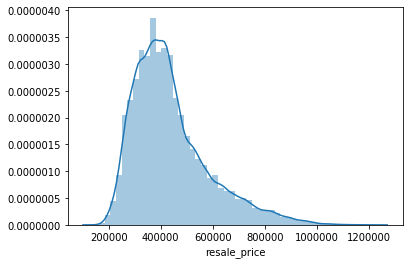

In [20]:
# histogram of resale_price
sns.distplot(housing_df['resale_price'])

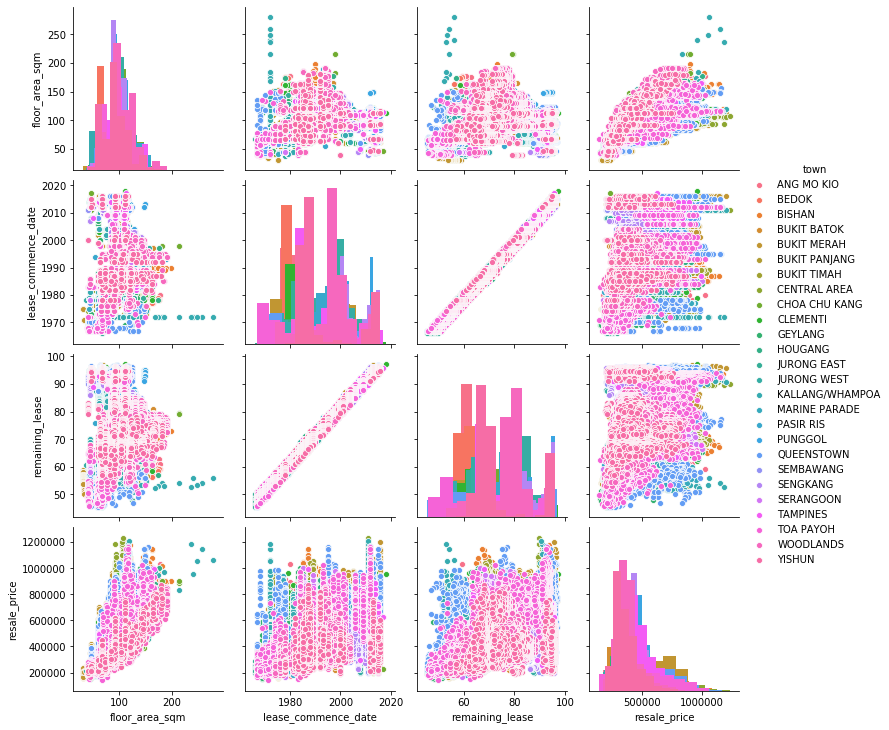

In [21]:
# check for multicollinearity
# resale_price and floor_area_sqm are related
sns.pairplot(housing_df, hue='town', diag_kind='hist')

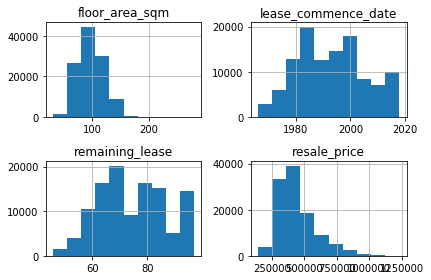

In [22]:
# check for skewness
housing_df.hist()
plt.tight_layout()

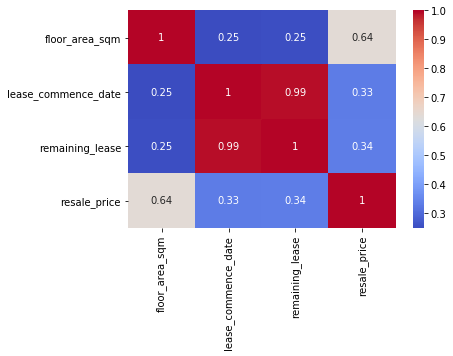

In [23]:
sns.heatmap(housing_df.corr(),annot=True, cmap='coolwarm')

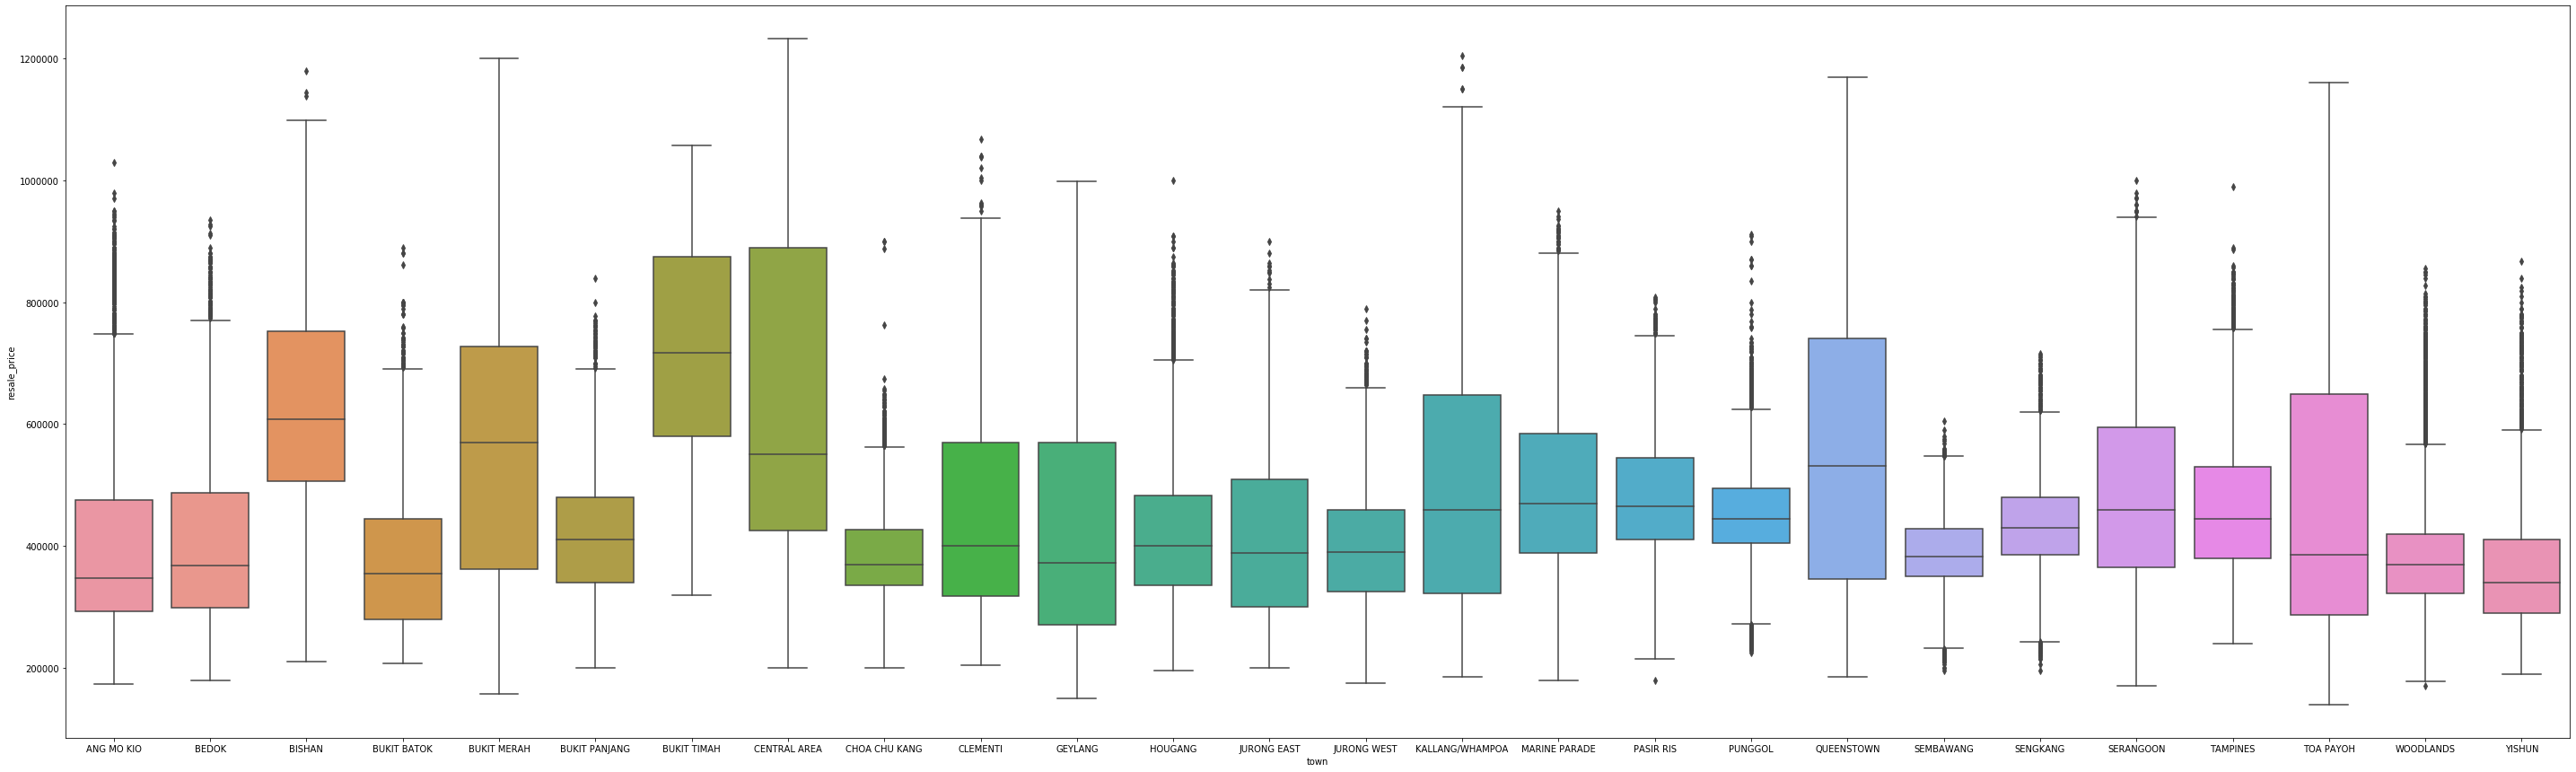

In [24]:
# box plot of town to resale_price
plt.figure(figsize=(50,15))
fig = sns.boxplot(x='town', y='resale_price', data=housing_df)

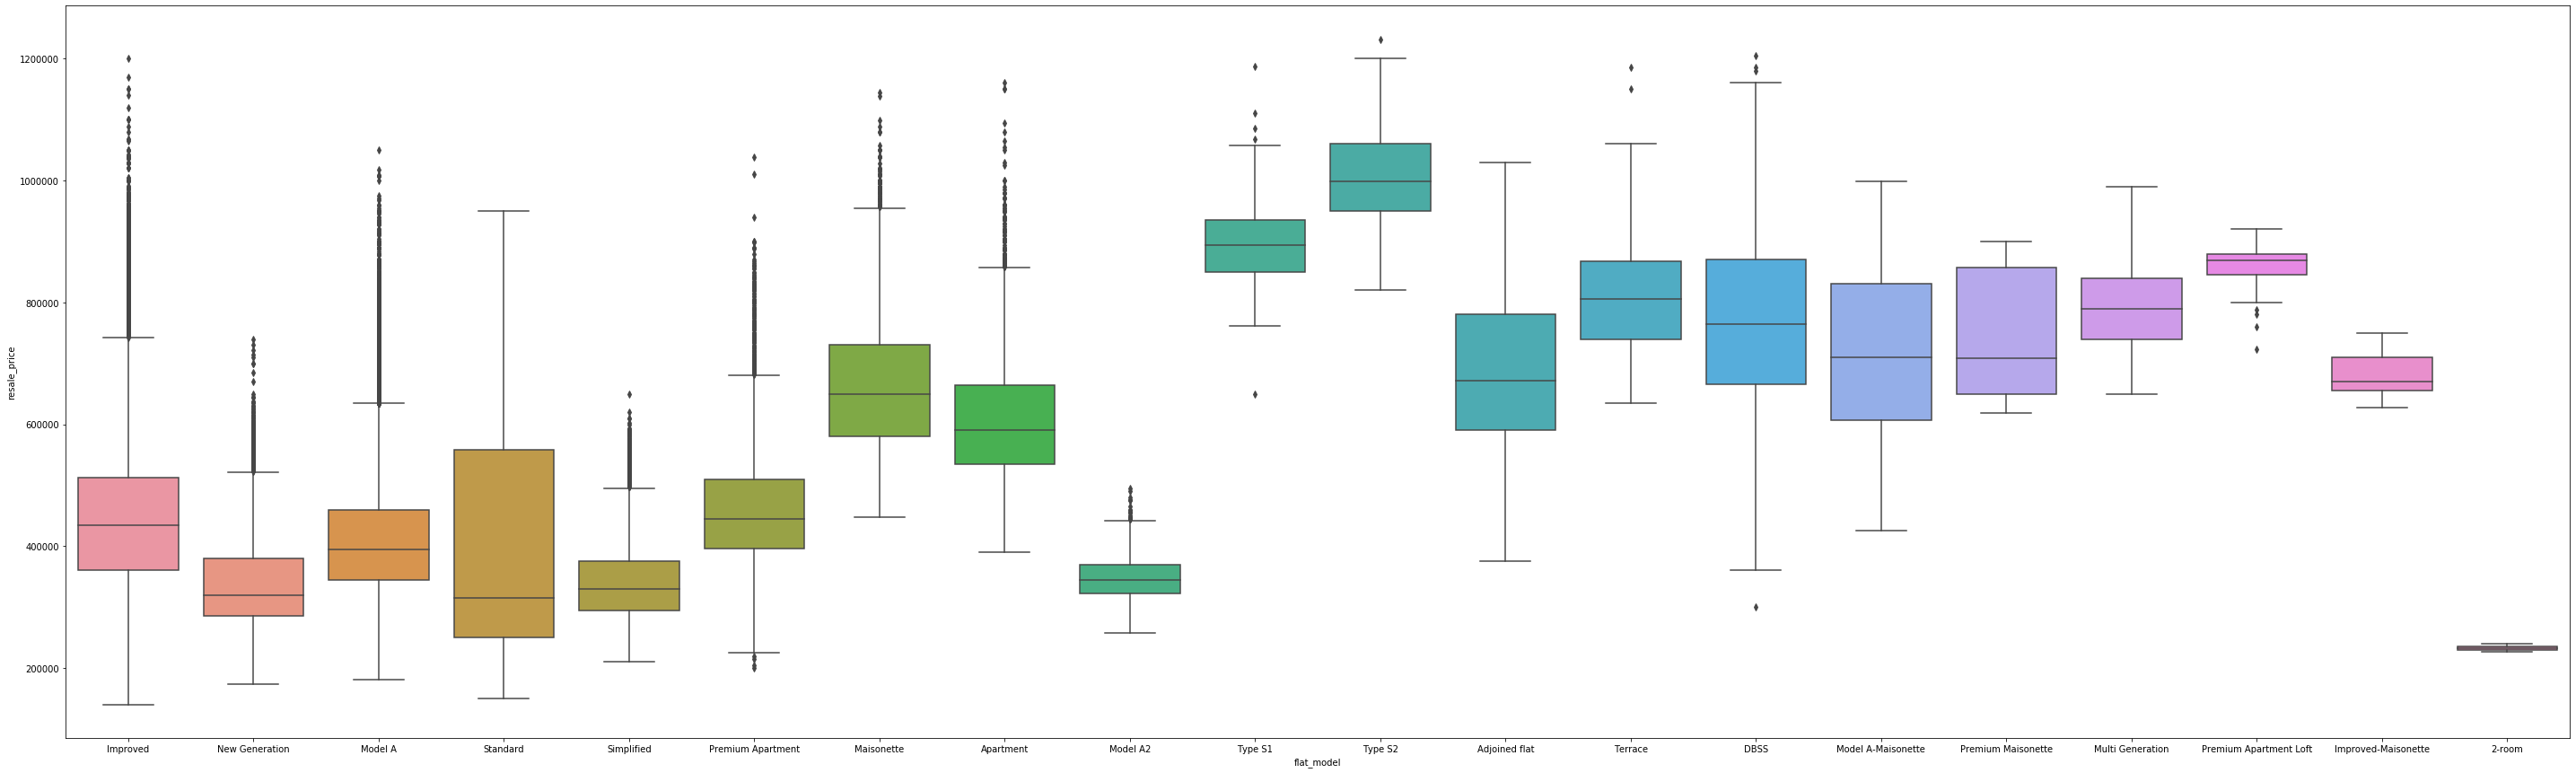

In [25]:
# box plot of flat_model to resale prices
plt.figure(figsize=(50,15))
fig = sns.boxplot(x='flat_model', y='resale_price', data=housing_df)

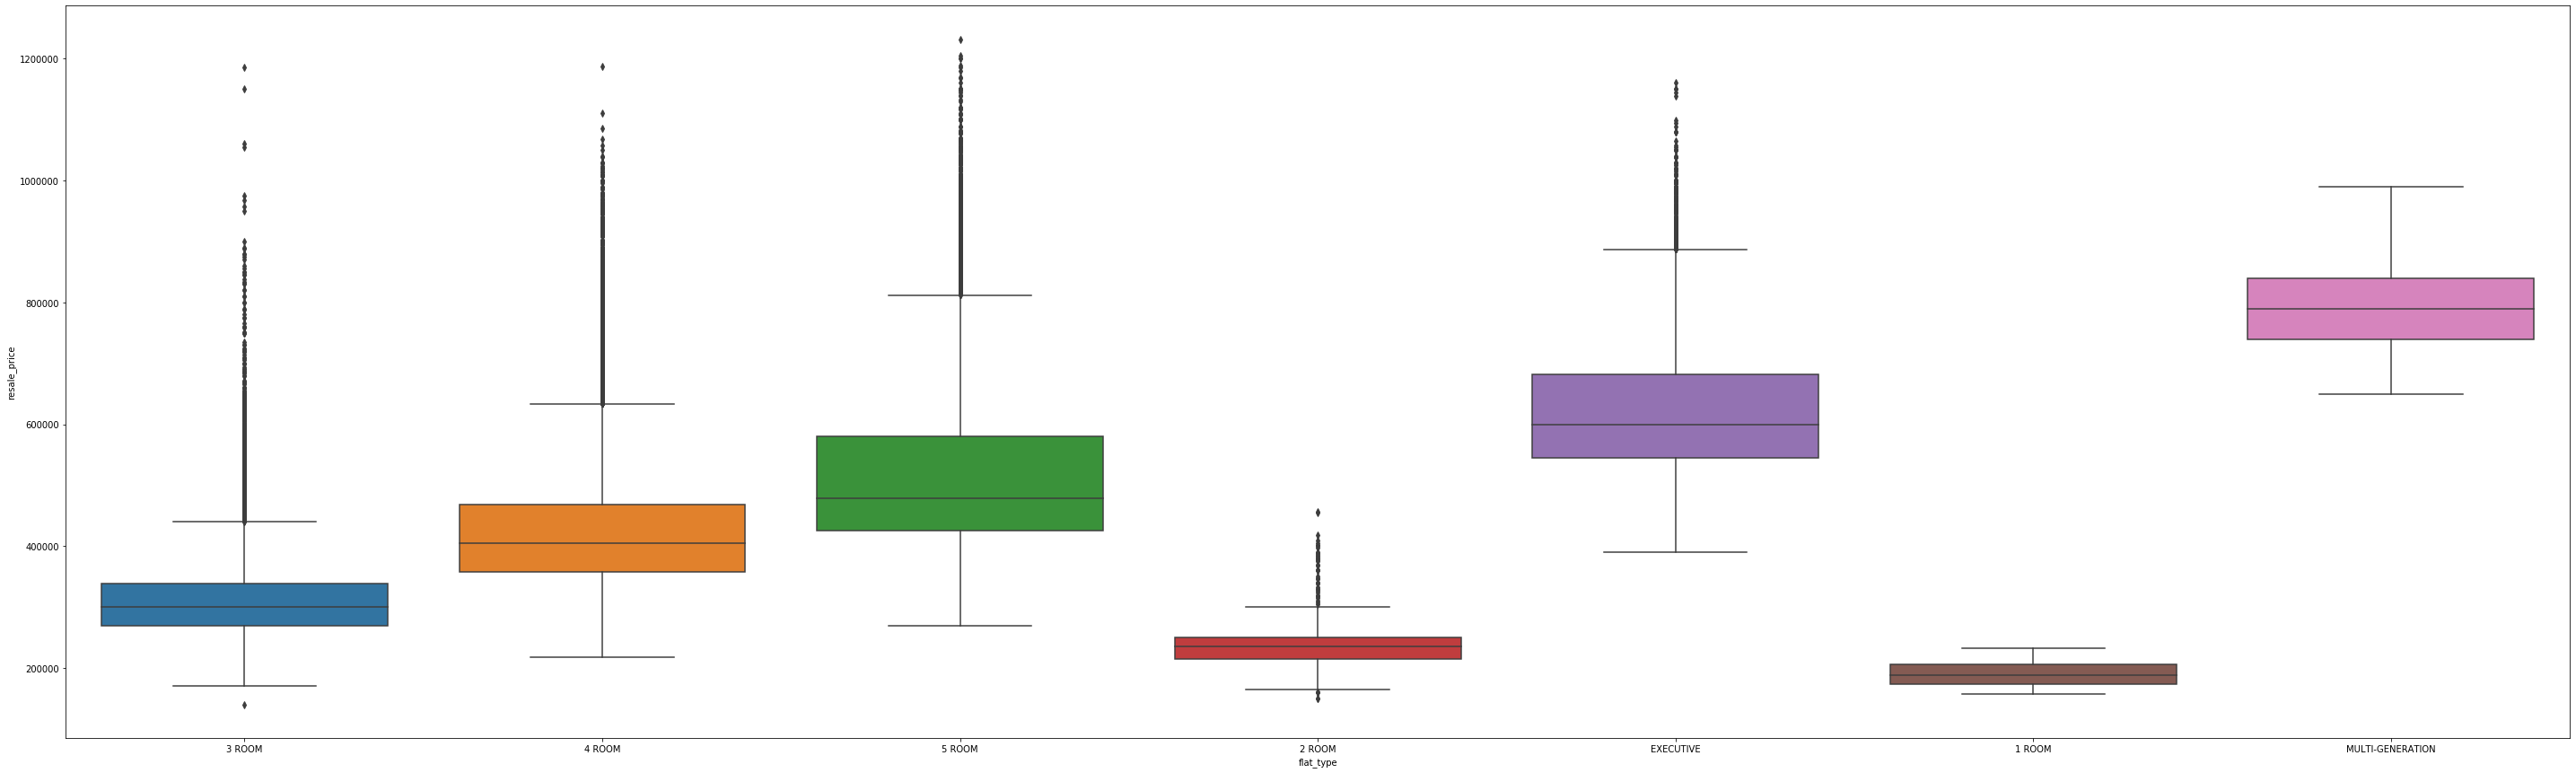

In [26]:
# box plot of flat_model to resale prices
plt.figure(figsize=(50,15))
fig = sns.boxplot(x='flat_type', y='resale_price', data=housing_df)

# 5) Feature Engineering

## 5.1) House latitude and longitude

The estimated runtime for this function is <b>2 days</b> on our local computer.
The <b>commented code</b> below shows the function for our feature engineering code. We used OneMapAPI to the get the distance to the nearest amenities. We then exported the generated distances to a csv file after running it for the first time. We will then import that csv file back into this notebook later for ease of presentation.

In [35]:
#Function to run using python

# from onemapsg import OneMapClient
# Client = OneMapClient("YOUR_EMAIL", "YOUR_PASSWORD")

# def get_lat_long(row):
#   try:
#     res = Client.search(row)
#     result = (res['results'][0]['LATITUDE'], res['results'][0]['LONGITUDE'])
#   except:
#     result = None

#   return result

# housing_df['full_address']=housing_df['block']+' '+housing_df['street_name']
# housing_df['latitude'] = housing_df['full_address'].apply(lambda x: get_lat_long(x)[0])
# housing_df['longitude'] = housing_df['full_address'].apply(lambda x: get_lat_long(x)[1])


## 5.2) Minimum Distance to Amenties

For the same reason as above (long runtime complexity), we will comment out the code we used to run it and import the post feature engineered excel

In [36]:
# housing_df['minDistanceFromMall']=np.nan
# housing_df['minDistanceFromMrt']=np.nan
# housing_df['minDistFromSch']=np.nan

# for index, row in hdb.iterrows(): 
#     housing_df.loc[index,'minDistanceFromMall'] ,hdb.loc[index,'minDistanceFromMrt'] ,hdb.loc[index,'minDistFromSch'] =calculateNearestDistance(row['latitude'],row['longitude'],mall_df,mrt_df,school_df)

### Importing back the csv file with our distances to amenities generated

In [12]:
#At this point, the dataset looks like this:
housing_df = pd.read_csv("data/data.csv")
housing_df.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            60.0        Improved                 1986             70.0   
1            68.0  New Generation                 1981             65.0   
2            69.0  New Generation                 1980             64.0   
3            68.0  New Generation                 1979             63.0   
4            68.0  New Generation                 1980             64.0   

   resale_price           full_address  latitude   longitude  \
0      255000.0   174 ANG MO KIO AVE 4  1.375097  103.837619   
1      275000.0  541 ANG MO KIO AVE 10  1.373922  103.855621   
2      285000.0   163 ANG MO KIO AVE 4  1.373549  103.838177   
3      290000.0  446 ANG MO KIO AVE 10  1.367761  103.855357   
4      290000.0  557 ANG MO KIO AVE 10  1.371626  103.857736   

   minDistanceFromMall  minDistanceFromMrt  minDistFromSch  
0           893.278432          988.960998      210.896670  
1           813.149646          718.272789      420.358229  
2           796.220278         1063.134486      350.034254  
3           706.917955          619.745373      344.590308  
4           952.440214          830.384131      598.219907

## 5.3) Maturity of Estates

In [13]:
# code to get mature or not mature estate
def is_mature(town):
    
    not_mature = ['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'PUNGGOL',
             'SEMBAWANG', 'SENGKANG', 'WOODLANDS', 'YISHUN']
    mature = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG',
                 'KALLANG/WHAMPOA', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'MARINE PARADE']
    
    if town in mature:
        return 1
    elif town in not_mature:
        return 0
    
housing_df["is_mature"] = housing_df['town'].apply(lambda x: is_mature(x))

In [14]:
housing_df.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            60.0        Improved                 1986             70.0   
1            68.0  New Generation                 1981             65.0   
2            69.0  New Generation                 1980             64.0   
3            68.0  New Generation                 1979             63.0   
4            68.0  New Generation                 1980             64.0   

   resale_price           full_address  latitude   longitude  \
0      255000.0   174 ANG MO KIO AVE 4  1.375097  103.837619   
1      275000.0  541 ANG MO KIO AVE 10  1.373922  103.855621   
2      285000.0   163 ANG MO KIO AVE 4  1.373549  103.838177   
3      290000.0  446 ANG MO KIO AVE 10  1.367761  103.855357   
4      290000.0  557 ANG MO KIO AVE 10  1.371626  103.857736   

   minDistanceFromMall  minDistanceFromMrt  minDistFromSch  is_mature  
0           893.278432          988.960998      210.896670          1  
1           813.149646          718.272789      420.358229          1  
2           796.220278         1063.134486      350.034254          1  
3           706.917955          619.745373      344.590308          1  
4           952.440214          830.384131      598.219907          1

# 6) Data Pre-Processing

## 6.1) Label Encoding

In [15]:
# label encoding town, flat_type, flat_model

from sklearn import preprocessing
le = preprocessing.LabelEncoder();

# label encoding "town"
housing_df['town_encode'] = le.fit_transform(housing_df['town'])

# label encoding "flat_type"
housing_df['flat_type_encode'] = le.fit_transform(housing_df['flat_type'])

# label encoding "flat_model"
housing_df['flat_model_encode'] = le.fit_transform(housing_df['flat_model'])

#label encoding "month"
housing_df['month_encode'] = le.fit_transform(housing_df['month'])

def get_mean_storey(row):
    range_categories = {"01 TO 03": 2, "04 TO 06": 5, "07 TO 09": 8, "10 TO 12": 11, "13 TO 15": 14, "16 TO 18": 17, "19 TO 21": 20, "22 TO 24": 23, "25 TO 27": 26, "28 TO 30": 29, "31 TO 33": 32, "34 TO 36": 35, "37 TO 39": 38, "40 TO 42": 41, "43 TO 45": 44, "46 TO 48": 47, "49 TO 51": 50}
    if row in range_categories:
        return range_categories[row]
    else:
        return None

housing_df['mean_storey'] = housing_df['storey_range'].apply(lambda x: get_mean_storey(x))

housing_df.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  ...  \
0            60.0        Improved                 1986             70.0  ...   
1            68.0  New Generation                 1981             65.0  ...   
2            69.0  New Generation                 1980             64.0  ...   
3            68.0  New Generation                 1979             63.0  ...   
4            68.0  New Generation                 1980             64.0  ...   

    longitude minDistanceFromMall  minDistanceFromMrt  minDistFromSch  \
0  103.837619          893.278432          988.960998      210.896670   
1  103.855621          813.149646          718.272789      420.358229   
2  103.838177          796.220278         1063.134486      350.034254   
3  103.855357          706.917955          619.745373      344.590308   
4  103.857736          952.440214          830.384131      598.219907   

   is_mature  town_encode  flat_type_encode  flat_model_encode  month_encode  \
0          1            0                 2                  4             0   
1          1            0                 2                 11             0   
2          1            0                 2                 11             0   
3          1            0                 2                 11             0   
4          1            0                 2                 11             0   

   mean_storey  
0            8  
1            2  
2            2  
3            2  
4            8  

[5 rows x 23 columns]

## 6.2) Dropping Irrelevant Columns

### Besides dropping all columns with non-numerical variables, below is the numerical columns that we've dropped and the reasoning.
1. <i>lease_commence_date</i> - it has 0.99 correlation with remaining_lease, will lead to <b>problem of multicollinearity</b> in regression models.
2. <i>floor_area_sqm</i> - it has 0.95 correlation with flat_type_encode, will lead to <b>problem of multicollinearity</b> in regression models.

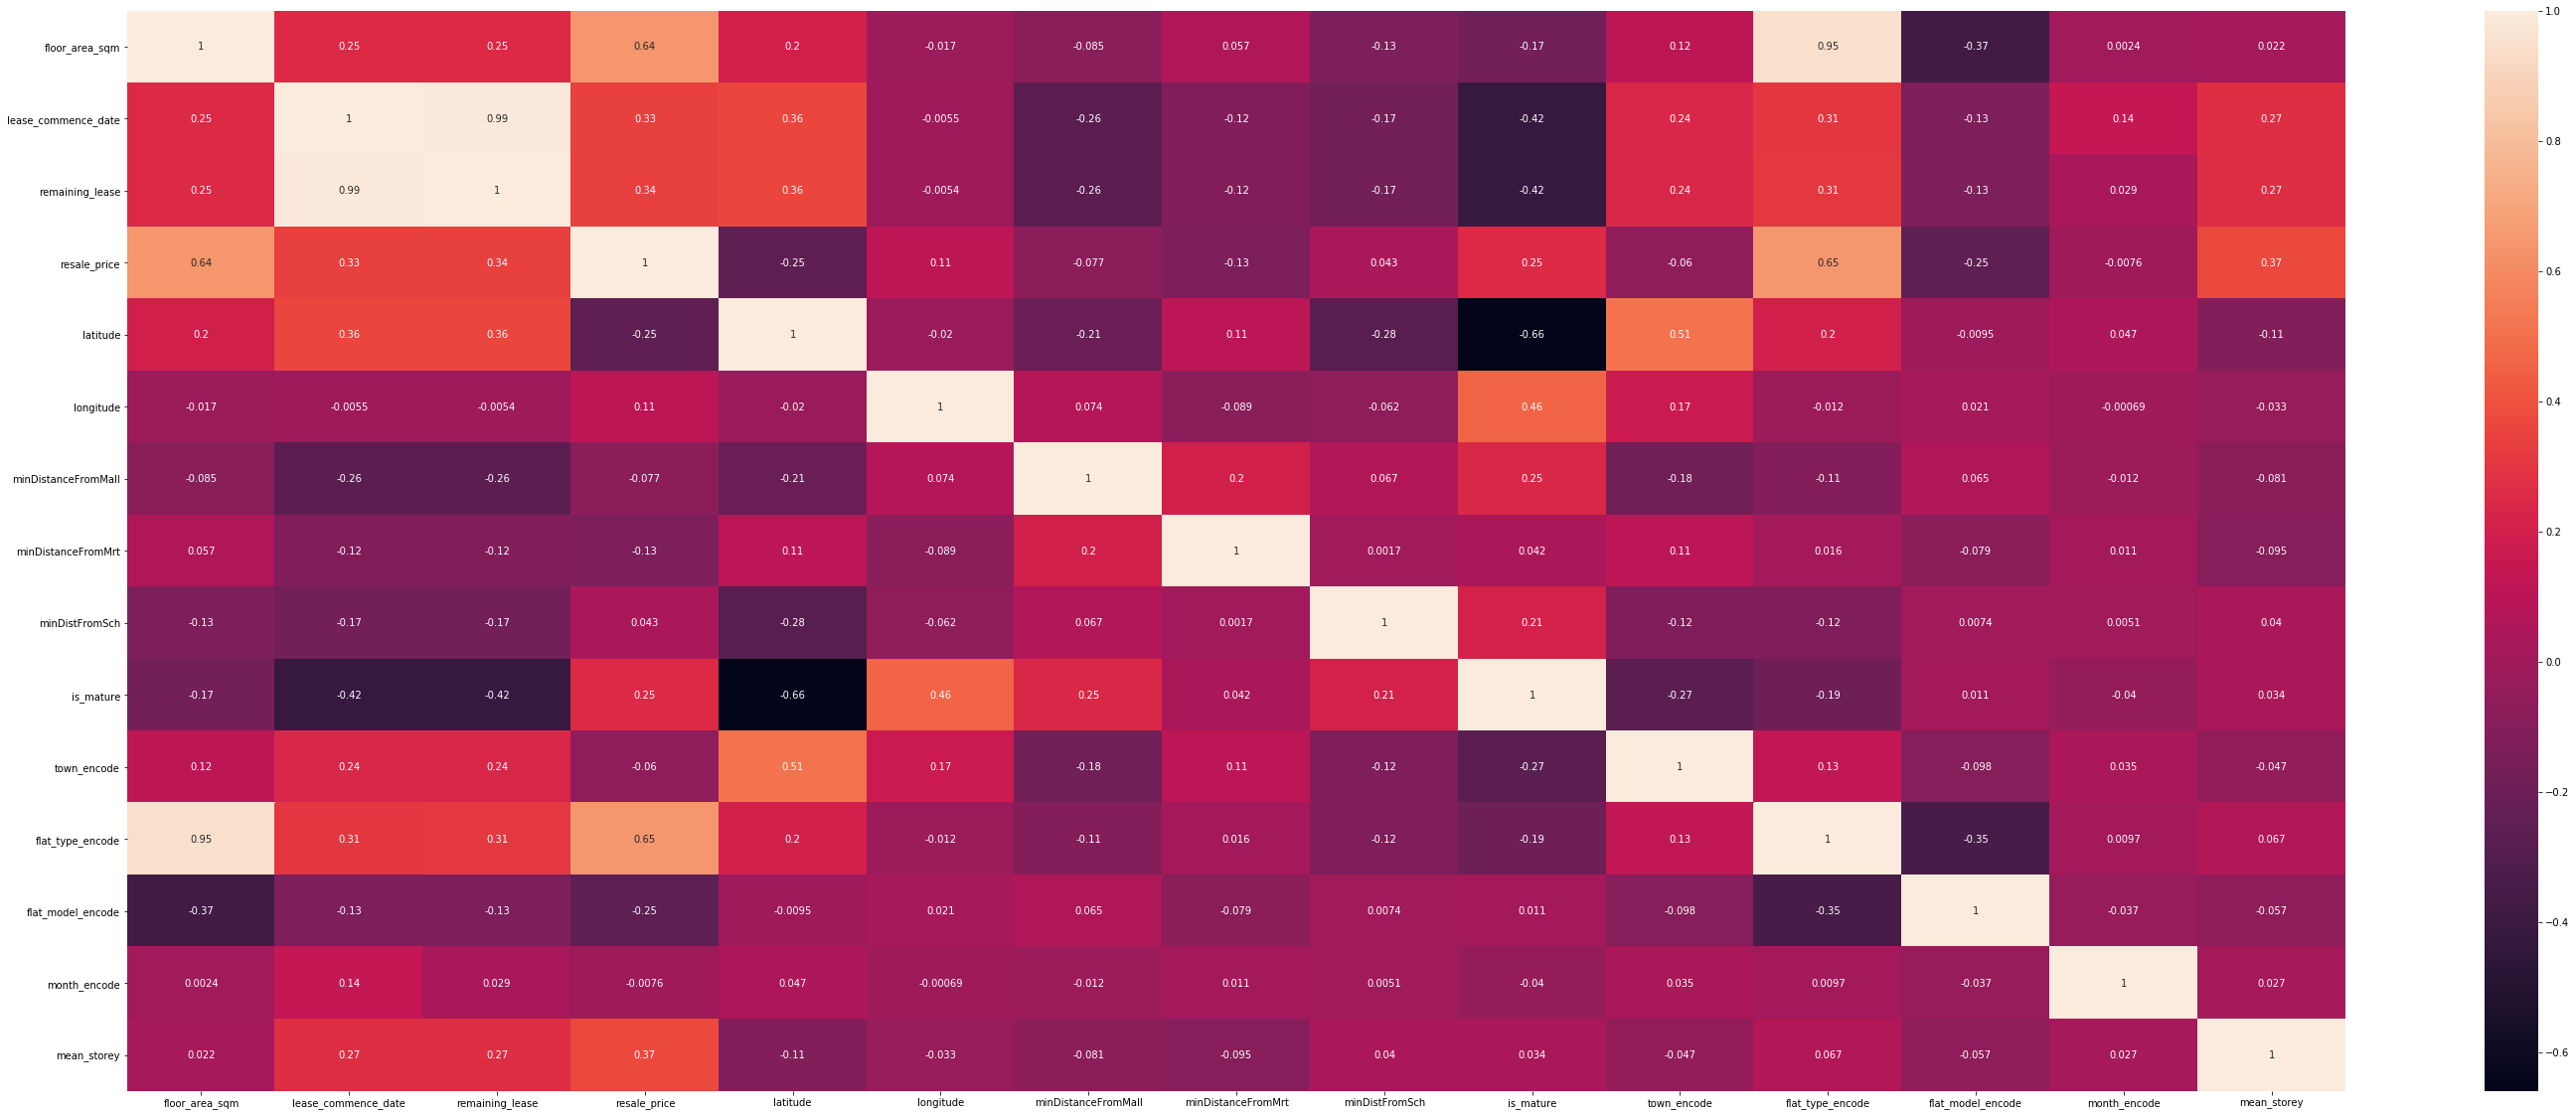

In [16]:
plt.figure(figsize=(50,20))
sns.heatmap(housing_df.corr(), annot=True)
plt.show()

In [17]:
selected_columns = ["remaining_lease", "resale_price", "minDistanceFromMall", "minDistanceFromMrt", "minDistFromSch","is_mature", "town_encode", "flat_type_encode", "flat_model_encode", "mean_storey","month_encode"]
final_df = housing_df.copy()
final_df = final_df[selected_columns]
final_df.head()


remaining_lease  resale_price  minDistanceFromMall  minDistanceFromMrt  \
0             70.0      255000.0           893.278432          988.960998   
1             65.0      275000.0           813.149646          718.272789   
2             64.0      285000.0           796.220278         1063.134486   
3             63.0      290000.0           706.917955          619.745373   
4             64.0      290000.0           952.440214          830.384131   

   minDistFromSch  is_mature  town_encode  flat_type_encode  \
0      210.896670          1            0                 2   
1      420.358229          1            0                 2   
2      350.034254          1            0                 2   
3      344.590308          1            0                 2   
4      598.219907          1            0                 2   

   flat_model_encode  mean_storey  month_encode  
0                  4            8             0  
1                 11            2             0  
2                 11            2             0  
3                 11            2             0  
4                 11            8             0

## 6.3) Data Standardization

In [18]:
housing_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'full_address', 'latitude',
       'longitude', 'minDistanceFromMall', 'minDistanceFromMrt',
       'minDistFromSch', 'is_mature', 'town_encode', 'flat_type_encode',
       'flat_model_encode', 'month_encode', 'mean_storey'],
      dtype='object')

In [19]:
scaler = StandardScaler()
final_df = pd.DataFrame(scaler.fit_transform(final_df),columns=selected_columns)
final_df.head()

remaining_lease  resale_price  minDistanceFromMall  minDistanceFromMrt  \
0        -0.363679     -1.237364             0.925927            1.038935   
1        -0.775289     -1.102024             0.680862            0.324547   
2        -0.857611     -1.034354             0.629085            1.234690   
3        -0.939933     -1.000519             0.355964            0.064518   
4        -0.857611     -1.000519             1.106867            0.620426   

   minDistFromSch  is_mature  town_encode  flat_type_encode  \
0       -0.452426    1.14337    -1.709028         -1.213145   
1        0.846581    1.14337    -1.709028         -1.213145   
2        0.410457    1.14337    -1.709028         -1.213145   
3        0.376695    1.14337    -1.709028         -1.213145   
4        1.949617    1.14337    -1.709028         -1.213145   

   flat_model_encode  mean_storey  month_encode  
0          -1.016954    -0.081788     -1.804915  
1           0.870734    -1.151769     -1.804915  
2           0.870734    -1.151769     -1.804915  
3           0.870734    -1.151769     -1.804915  
4           0.870734    -0.081788     -1.804915

# 7) Regression Modelling

In [20]:
#Global Variables
dependant_var = "resale_price"
y = final_df[dependant_var]
column_names = []
for column in final_df.columns:
    if column != dependant_var:
        column_names.append(column)
x = final_df[column_names]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state=424)

alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1]

## 7.1) Linear Regression



In [48]:
linear_mse = linear_model(x_train, x_test, y_train, y_test)

In [49]:
print (f"MSE of linear regression: {linear_mse}")

MSE of linear regression: 0.2654573200281019


## 7.2) Lasso Regression

In [50]:
lasso_mse_dict = sgd_lasso(x_train, x_test, y_train, y_test)

In [51]:
for i in range(len(lasso_mse_dict)):
    print(f"MSE of lasso regression with stochastic gradient descent alpha {alpha[i]}: {lasso_mse_dict[alpha[i]]}")

MSE of lasso regression with stochastic gradient descent alpha 1e-06: 0.2665553779829147
MSE of lasso regression with stochastic gradient descent alpha 1e-05: 0.2665532244372244
MSE of lasso regression with stochastic gradient descent alpha 0.0001: 0.26655619898885263
MSE of lasso regression with stochastic gradient descent alpha 0.001: 0.266645193448628
MSE of lasso regression with stochastic gradient descent alpha 0.01: 0.2687687427322329
MSE of lasso regression with stochastic gradient descent alpha 0.1: 0.3194276308716613
MSE of lasso regression with stochastic gradient descent alpha 1: 1.0078260728570339


## 7.3) Ridge Regression

In [52]:
ridge_mse_dict = sgd_ridge(x_train, x_test, y_train, y_test)

In [53]:
for i in range(len(ridge_mse_dict)):
    print(f"MSE of ridge regression with stochastic gradient descent alpha {alpha[i]}: {ridge_mse_dict[alpha[i]]}")

MSE of ridge regression with stochastic gradient descent alpha 1e-06: 0.26655562175977354
MSE of ridge regression with stochastic gradient descent alpha 1e-05: 0.26655582802764466
MSE of ridge regression with stochastic gradient descent alpha 0.0001: 0.26655790016933045
MSE of ridge regression with stochastic gradient descent alpha 0.001: 0.2665795650464681
MSE of ridge regression with stochastic gradient descent alpha 0.01: 0.26688778971661475
MSE of ridge regression with stochastic gradient descent alpha 0.1: 0.2769043970668029
MSE of ridge regression with stochastic gradient descent alpha 1: 0.47348265970788256


## 7.4) K-Neighbors Regression

In [54]:
kn_mse_score = KNeighbors_model(x_train,x_test,y_train,y_test)
#Euclidean distance

In [55]:
print (f"MSE of K-Neighbors regression: {kn_mse_score}")

MSE of K-Neighbors regression: 0.05991323051472203


## 7.5) Decision Tree Regression

In [56]:
dt_mse_score = decisiontree_model(x_train, x_test, y_train, y_test)

In [57]:
print (f"MSE of Decision Tree regression: {dt_mse_score}")

MSE of Decision Tree regression: 0.0635308567379436


## 7.6) Elasticnet Regression

In [58]:
elasticnet_mse_dict = sgd_elasticnet(x_train, x_test, y_train, y_test)

In [59]:
for i in range(len(elasticnet_mse_dict)):
    print(f"MSE of elasticnet regression with stochastic gradient descent alpha {alpha[i]}: {elasticnet_mse_dict[alpha[i]]}")

MSE of elasticnet regression with stochastic gradient descent alpha 1e-06: 0.2665555003471642
MSE of elasticnet regression with stochastic gradient descent alpha 1e-05: 0.2665545631272373
MSE of elasticnet regression with stochastic gradient descent alpha 0.0001: 0.2665529442847672
MSE of elasticnet regression with stochastic gradient descent alpha 0.001: 0.2666062114633023
MSE of elasticnet regression with stochastic gradient descent alpha 0.01: 0.2677116807427644
MSE of elasticnet regression with stochastic gradient descent alpha 0.1: 0.29049089990637966
MSE of elasticnet regression with stochastic gradient descent alpha 1: 0.911357533706785


## 7.7) Conclusion of Regression Models

In [60]:
# Linear
print("*"*20+"Linear"+"*"*20)
print(f"MSE score: {linear_mse}")
print("")


#Lasso
# sort lasso_mse_dict by values in ascending order
lasso_mse_dict_sorted = {k: v for k, v in sorted(lasso_mse_dict.items(), key=lambda lasso_mse_dict: lasso_mse_dict[1])}
optimal_alpha_lasso = list(lasso_mse_dict_sorted)[0]
print("*"*20+"Lasso"+"*"*20)
print(f"Optimal alpha value is {optimal_alpha_lasso} with MSE: {lasso_mse_dict[optimal_alpha_lasso]}")
print("")


#Ridge
# sort ridge_mse_dict by values in ascending order
print("*"*20+"Ridge"+"*"*20)
ridge_mse_dict_sorted = {k: v for k, v in sorted(ridge_mse_dict.items(), key=lambda ridge_mse_dict: ridge_mse_dict[1])}
optimal_alpha_ridge = optimal_alpha_ridge = list(ridge_mse_dict_sorted)[0]
print(f"Optimal alpha value is {optimal_alpha_ridge} with MSE: {ridge_mse_dict[optimal_alpha_ridge]}")
print("")


#KNeighbors
print("*"*20+"KNeighbors"+"*"*20)
KN_mse = KNeighbors_model(x_train,x_test,y_train,y_test)
print(f"MSE: {KN_mse}")
print("")


#Decision Tree
print("*"*20+"Decision Tree"+"*"*20)
dt_mse = decisiontree_model(x_train,x_test,y_train,y_test)
print(f"MSE: {dt_mse}")
print("")


#Elasticnet
print("*"*20+"Elasticnet"+"*"*20)

elasticnet_mse_dict_sorted = {k: v for k, v in sorted(elasticnet_mse_dict.items(), key=lambda elasticnet_mse_dict: elasticnet_mse_dict[1])}
optimal_alpha_elasticnet = optimal_alpha_elasticnet = list(elasticnet_mse_dict_sorted)[0]
print(f"Optimal alpha value is {optimal_alpha_elasticnet} with MSE: {elasticnet_mse_dict[optimal_alpha_elasticnet]}")
print("")

# print(f"MSE: {en_mse_score}")
# print("")


********************Linear********************
MSE score: 0.2654573200281019

********************Lasso********************
Optimal alpha value is 1e-05 with MSE: 0.2665532244372244

********************Ridge********************
Optimal alpha value is 1e-06 with MSE: 0.26655562175977354

********************KNeighbors********************
MSE: 0.05991323051472203

********************Decision Tree********************
MSE: 0.0635308567379436

********************Elasticnet********************
Optimal alpha value is 0.0001 with MSE: 0.2665529442847672



In [61]:
overall_regression_dict = {}
overall_regression_dict["Linear Regression"]= linear_mse
overall_regression_dict["Lasso Regression"]=lasso_mse_dict[optimal_alpha_lasso]
overall_regression_dict["Ridge Regression"]= ridge_mse_dict[optimal_alpha_ridge]
overall_regression_dict["K Neighbors Regression"]= KN_mse
overall_regression_dict["Decision Tree Regression"] = dt_mse
overall_regression_dict["Elastic Net Regression"] = elasticnet_mse_dict[optimal_alpha_elasticnet]

overall_regression_dict_sorted = {k: v for k, v in sorted(overall_regression_dict.items(), key=lambda overall_regression_dict: overall_regression_dict[1])}
overall_regression_list_sorted = list(overall_regression_dict_sorted)

print("The best regression models are: \n")
for i in range(1,len(overall_regression_dict_sorted)+1):
    print(f"Rank {i}: {overall_regression_list_sorted[i-1]}, MSE: {overall_regression_dict_sorted[overall_regression_list_sorted[i-1]]} ")


The best regression models are: 

Rank 1: K Neighbors Regression, MSE: 0.05991323051472203 
Rank 2: Decision Tree Regression, MSE: 0.0635308567379436 
Rank 3: Linear Regression, MSE: 0.2654573200281019 
Rank 4: Elastic Net Regression, MSE: 0.2665529442847672 
Rank 5: Lasso Regression, MSE: 0.2665532244372244 
Rank 6: Ridge Regression, MSE: 0.26655562175977354 


# 8) Ensembles

## 8.1) Adaboost

In [62]:
ada_mse = ada_model(x_train, x_test, y_train, y_test)

In [63]:
print (f"MSE of Adaboost ensemble: {ada_mse}")

MSE of Adaboost ensemble: 0.48573859593850793


## 8.2) XGBoost

In [64]:
xgb_mse = xgboost_model(x_train, x_test, y_train, y_test)

In [65]:
print (f"MSE of XGBoost ensemble: {xgb_mse}")

MSE of XGBoost ensemble: 0.04381866931444761


## 8.3) Random Forest

In [66]:
rf_mse = randomforest_model(x_train, x_test, y_train, y_test)

In [67]:
print (f"MSE of Random Forest ensemble: {rf_mse}")

MSE of Random Forest ensemble: 0.034532684027038116


## 8.4) Conclusion of Ensemble Models

In [68]:
overall_ensemble_dict = {}
overall_ensemble_dict["Adaboost Ensemble"] = ada_mse
overall_ensemble_dict["XGBoost Ensemble"] = xgb_mse
overall_ensemble_dict["Random Forest Ensemble"] = rf_mse

overall_ensemble_dict_sorted = {k: v for k, v in sorted(overall_ensemble_dict.items(), key=lambda overall_ensemble_dict: overall_ensemble_dict[1])}
overall_ensemble_list_sorted = list(overall_ensemble_dict_sorted)

print("The best ensembles are: \n")
for i in range(1,len(overall_ensemble_dict_sorted)+1):
    print(f"Rank {i}: {overall_ensemble_list_sorted[i-1]}, MSE: {overall_ensemble_dict_sorted[overall_ensemble_list_sorted[i-1]]} ")


The best ensembles are: 

Rank 1: Random Forest Ensemble, MSE: 0.034532684027038116 
Rank 2: XGBoost Ensemble, MSE: 0.04381866931444761 
Rank 3: Adaboost Ensemble, MSE: 0.48573859593850793 


# 9) Model Selection

## 9.1) Regression and Ensemble Models

In [69]:
overall_dict = {**overall_ensemble_dict, **overall_regression_dict}

overall_dict_sorted = {k: v for k, v in sorted(overall_dict.items(), key=lambda overall_dict: overall_dict[1])}
overall_list_sorted = list(overall_dict_sorted)

print("The best models (regression & ensembles) are: \n")
for i in range(1,len(overall_dict_sorted)+1):
    print(f"Rank {i}: {overall_list_sorted[i-1]}, MSE: {overall_dict_sorted[overall_list_sorted[i-1]]} ")

The best models (regression & ensembles) are: 

Rank 1: Random Forest Ensemble, MSE: 0.034532684027038116 
Rank 2: XGBoost Ensemble, MSE: 0.04381866931444761 
Rank 3: K Neighbors Regression, MSE: 0.05991323051472203 
Rank 4: Decision Tree Regression, MSE: 0.0635308567379436 
Rank 5: Linear Regression, MSE: 0.2654573200281019 
Rank 6: Elastic Net Regression, MSE: 0.2665529442847672 
Rank 7: Lasso Regression, MSE: 0.2665532244372244 
Rank 8: Ridge Regression, MSE: 0.26655562175977354 
Rank 9: Adaboost Ensemble, MSE: 0.48573859593850793 


## 9.2) G2T3voting

Our group decided to create our own ensemble using our models that are performing well (MSE<0.1)

In [70]:
print("The models that meet this requirement above are:")
for i in range(4):
    print(overall_list_sorted[i])
print("")
print("We will be using the 4 models above to create our ensemble.")


The models that meet this requirement above are:
Random Forest Ensemble
XGBoost Ensemble
K Neighbors Regression
Decision Tree Regression

We will be using the 4 models above to create our ensemble.


In [76]:
random_forest_ensemble = RandomForestRegressor(random_state=424)
xgboost_ensemble = xgboost.XGBRegressor(random_state=424)
kn_regressor = KNeighborsRegressor()
dt_regressor = DecisionTreeRegressor(random_state=424)
estimators_voting = [("rf",random_forest_ensemble),("xgb",xgboost_ensemble),("kn",kn_regressor),("dt",dt_regressor)]

G2T3Reg = VotingRegressor(estimators = estimators_voting, n_jobs=-1)
G2T3Reg.fit(x_train,y_train)
G2T3pred_voting = G2T3Reg.predict(x_test)

G2T3_mse_voting = metrics.mean_squared_error(y_test, G2T3pred_voting)
print(f"Our own voting ensemble returns a MSE of {G2T3_mse_voting}.")

Our own voting ensemble returns a MSE of 0.03614292207820641.


## 9.3 G2T3stacking

In [77]:
random_forest_ensemble = RandomForestRegressor(random_state=424)
xgboost_ensemble = xgboost.XGBRegressor(random_state=424)
kn_regressor = KNeighborsRegressor()
dt_regressor = DecisionTreeRegressor(random_state=424)

estimators_stacking = [("rf",random_forest_ensemble),("xgb",xgboost_ensemble),("kn",kn_regressor),("dt",dt_regressor)]
G2T3stacking = StackingRegressor(estimators=estimators_stacking, final_estimator=RandomForestRegressor(random_state=424), n_jobs=-1, verbose=1)
G2T3stacking.fit(x_train, y_train)
G2T3pred_stacking = G2T3stacking.predict(x_test)

G2T3_mse_stacking = metrics.mean_squared_error(y_test, G2T3pred_stacking)
print(f"Our own stacking ensemble returns MSE of {G2T3_mse_stacking}")

Our own stacking ensemble returns MSE of 0.035711498130976925


## 9.4) G2T3 voting and stacking performance

In [78]:
G2T3_performance = {}
G2T3_performance["G2T3voting Ensemble"] = G2T3_mse_voting
G2T3_performance["G2T3stacking Ensemble"] = G2T3_mse_stacking
overall_dict_g2t3 = {**overall_dict, **G2T3_performance}

overall_dict_g2t3_sorted = {k: v for k, v in sorted(overall_dict_g2t3.items(), key=lambda overall_dict_g2t3: overall_dict_g2t3[1])}
overall_list_g2t3_sorted = list(overall_dict_g2t3_sorted)

print("The best models (regression & ensembles) are: \n")
for i in range(1,len(overall_dict_g2t3_sorted)+1):
    if overall_list_g2t3_sorted[i-1]=="G2T3voting Ensemble":
        g2t3_voting_rank = i
    if overall_list_g2t3_sorted[i-1]=="G2T3stacking Ensemble":
        g2t3_ensemble_rank = i
    print(f"Rank {i}: {overall_list_g2t3_sorted[i-1]}, MSE: {overall_dict_g2t3_sorted[overall_list_g2t3_sorted[i-1]]} ")

The best models (regression & ensembles) are: 

Rank 1: Random Forest Ensemble, MSE: 0.034532684027038116 
Rank 2: G2T3stacking Ensemble, MSE: 0.035711498130976925 
Rank 3: G2T3voting Ensemble, MSE: 0.03614292207820641 
Rank 4: XGBoost Ensemble, MSE: 0.04381866931444761 
Rank 5: K Neighbors Regression, MSE: 0.05991323051472203 
Rank 6: Decision Tree Regression, MSE: 0.0635308567379436 
Rank 7: Linear Regression, MSE: 0.2654573200281019 
Rank 8: Elastic Net Regression, MSE: 0.2665529442847672 
Rank 9: Lasso Regression, MSE: 0.2665532244372244 
Rank 10: Ridge Regression, MSE: 0.26655562175977354 
Rank 11: Adaboost Ensemble, MSE: 0.48573859593850793 


In [79]:
print(f"G2T3voting ensemble ranked {g2t3_voting_rank} among all regression and ensemble models")
print(f"G2T3stacking ensemble ranked {g2t3_ensemble_rank} among all regression and ensemble models")

G2T3voting ensemble ranked 3 among all regression and ensemble models
G2T3stacking ensemble ranked 2 among all regression and ensemble models


## 9.4) Selected Model

In [80]:
print(f"Our group will be proceeding with {overall_list_g2t3_sorted[0]} as it gives the lowest MSE.")

Our group will be proceeding with Random Forest Ensemble as it gives the lowest MSE.


# 10) Feature Selection

## 10.1) Pearson's Correlation Coefficient

Feature 1: remaining_lease: 4.837916047471704
Feature 2: minDistanceFromMall: 159.00178844294126
Feature 3: minDistanceFromMrt: 307.7975073730635
Feature 4: minDistFromSch: 553.8442661646797
Feature 5: is_mature: 1575.6867106894686
Feature 6: town_encode: 6076.307623427806
Feature 7: flat_type_encode: 6136.842789594001
Feature 8: flat_model_encode: 11325.755045360675
Feature 9: mean_storey: 14170.695836029163
Feature 10: month_encode: 64512.438125636356


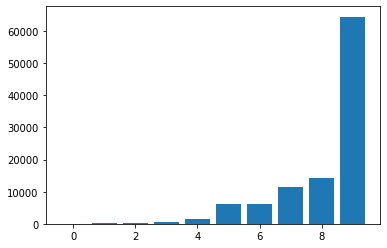

In [83]:
fs_model = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k="all")
fs_model.fit(x_train, y_train)
x_train_selected = fs_model.transform(x_train)
x_test_selected = fs_model.transform(x_test)
feature_ranking_dict = {}

dependant_var = "resale_price"

column_names = []
for column in final_df.columns:
    # Get column names of all independent variables
    if column!= dependant_var:
        column_names.append(column)

for i in range(len(fs_model.scores_)):
    feature_ranking_dict[column_names[i]] = fs_model.scores_[i]
    print(f"Feature {i+1}: {column_names[i]}: {fs_model.scores_[i]}")

#Visualization
feature_ranking_dict_sorted = {k: v for k, v in sorted(feature_ranking_dict.items(), key=lambda feature_ranking_dict: feature_ranking_dict[1])}
plt.bar([i for i in range(len(fs_model.scores_))], fs_model.scores_)
plt.show()

In [86]:
num_of_features = []
mse_score = []
top_features = list(feature_ranking_dict_sorted)
for i in range(len(top_features)):
    num_of_features.append(i)
    y = final_df[dependant_var]
    x = final_df[top_features[:i+1]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=424)
    from sklearn.ensemble import RandomForestRegressor
    rf_model = RandomForestRegressor(random_state=424, n_jobs=-1, verbose=1)
    rf_model.fit(x_train,y_train)
    y_pred = rf_model.predict(x_test)
    mse = metrics.mean_squared_error(y_test,y_pred)
    mse_score.append(mse)
mse_score

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

[0.8388812123801943,
 0.3106473150324897,
 0.22843288437332912,
 0.21496403333692485,
 0.20858011083926148,
 0.20258486955827018,
 0.05530906464731732,
 0.05271177622977777,
 0.0354169150571042,
 0.034532684027038116]

### Calculating the MSE values of a RandomForestRegressor model by training it with different number of features for our model. This will help us determine which feature will be noise.

Optimal number of features: 10 out of 10



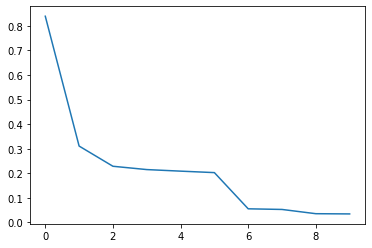

In [87]:
print (f"Optimal number of features: {mse_score.index(min(mse_score)) + 1} out of {len(mse_score)}\n")
plt.plot(num_of_features,mse_score)

In [88]:
print(f"These features are:\n")
for i in range(len(top_features)):
    print(top_features[::-1][i])

These features are:

month_encode
mean_storey
flat_model_encode
flat_type_encode
town_encode
is_mature
minDistFromSch
minDistanceFromMrt
minDistanceFromMall
remaining_lease


## 10.2) Dataset

We will be proceeding with the same dataset as the feature selection model shows that none of the features are noise. In other words, <b>all the features</b> contribute to a <b>lower MSE</b>.

# 11) Model Optimization via Hyperparamater Tuning

### Model optimization overview:
As our dataset contains >100k rows, it will take a very long time to finish running our hyperparamater tuning model. Thus, we used stratified sampling to get a representative sample of our dataset, and used this sample to run our hyperparameter tuning model on. The best combination of hyperparameters obtained will then be used to train a new model on the original dataset.

## 11.1) Stratified Sampling of Dataset

In [29]:
final_df.shape

(112626, 11)

### A sample of 10% will be created using stratified sampling.

In [30]:
# stratified sampling
# flat_type_encode use for strata criteria as it is independent variable with the most correlation with target variable
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.1, test_size=0.025, random_state=424)
for train_index, test_index in sss.split(final_df, final_df['flat_type_encode']):
    sss_train = final_df.loc[train_index]
    sss_test = final_df.loc[test_index]

In [31]:
final_df['flat_type_encode'].value_counts()

-0.131574    46448
-1.213145    28330
 0.949998    27409
 2.031569     8839
-2.294716     1510
-3.376288       51
 3.113141       39
Name: flat_type_encode, dtype: int64

In [32]:
# stratified sampled values, similar representation of values to final_df
sss_train['flat_type_encode'].value_counts()

-0.131574    4644
-1.213145    2833
 0.949998    2741
 2.031569     884
-2.294716     151
-3.376288       5
 3.113141       4
Name: flat_type_encode, dtype: int64

In [33]:
# check percentage of sample wrt to the orginal dataset
round((len(sss_train)/len(final_df))*100, 2)

10.0

In [34]:
# ratio of the top most occurring flat_type in the final_df dataset with the total length of the final_df dataset
round(final_df['flat_type_encode'].value_counts().iloc[0]/len(final_df), 3)

0.412

In [35]:
# ratio of the top most occurring flat_type in the sss_train dataset with the total length of the sss_train dataset
round(sss_train['flat_type_encode'].value_counts().iloc[0]/len(sss_train),3)

# same ratio as the ratio in the original dataset above!

0.412

In [36]:
# ratio of x_train to x_test ==> 4:1
round(len(x_train)/len(x_test), 2)

4.0

In [37]:
# ratio of sss_train to sss_test, same as ratio of x_train to x_test
round(len(sss_train)/len(sss_test), 2)

4.0

In [38]:
# splitting stratified sample dataset into training and testing datasets
selected_columns = ["remaining_lease", "minDistanceFromMall", "minDistanceFromMrt", "minDistFromSch","is_mature", "town_encode", "flat_type_encode", "flat_model_encode", "mean_storey","month_encode"]
sss_x_train = sss_train[selected_columns]
sss_y_train = sss_train["resale_price"]
sss_x_test = sss_test[selected_columns]
sss_y_test = sss_test['resale_price']


In [39]:
len(sss_x_test) == len(sss_y_test)

True

## 11.2) RandomizedSearchCV

In [42]:
#randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=424)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rscv_clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=424, n_jobs = -1)

rscv_clf.fit(sss_x_train, sss_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [43]:
print (f"optimized parameters: {rscv_clf.best_estimator_}")

optimized parameters: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=55, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=424, verbose=0, warm_start=False)


## 11.3) GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=424)
param = {
    'n_estimators': [500, 600, 700, 800, 900, 1000, 1100],
            'max_depth': [30, 50, 70, 80 ,90, None],
            'bootstrap': [True],
            'min_samples_split': [2],
            'min_samples_leaf': [1]
            }
        
gscv_clf = GridSearchCV(rf,param, cv=5, n_jobs=-1, verbose=2)
gscv_clf.fit(sss_x_train, sss_y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 15.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=424,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [45]:
gscv_clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=424, verbose=0, warm_start=False)

## 11.3) Evaluation of Hyperparameter Tuning
- Results: Hyperparameters generated by GridSearchCV produced the model with the best MSE.

In [24]:
# get MSE
best_rscv_model = RandomForestRegressor(random_state=424, n_estimators=1000, max_depth=55, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, verbose=1)
best_rscv_model.fit(x_train,y_train)
best_rscv_model_pred = best_rscv_model.predict(x_test)
best_rscv_model_mse = metrics.mean_squared_error(y_test, best_rscv_model_pred)
best_rscv_model_mse


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   56.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    3.2s finished


0.03420422280263472

In [27]:
# get MSE
print(f"MSE of model with best RandomizedSearchCV hyperparamaters: {best_rscv_model_mse}")

MSE of model with best RandomizedSearchCV hyperparamaters: 0.03420422280263472


In [28]:
best_gscv_model = RandomForestRegressor(random_state=424, n_estimators=1100, max_depth=50, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, verbose=1)
best_gscv_model.fit(x_train,y_train)
best_gscv_model_pred = best_gscv_model.predict(x_test)
best_gscv_model_mse = metrics.mean_squared_error(y_test, best_gscv_model_pred)
best_gscv_model_mse

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:  1.2min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    7.6s finished


0.03419456868392984

In [31]:
print(f"MSE of model with best GridSearchCV hyperparamaters: {best_gscv_model_mse}")

MSE of model with best GridSearchCV hyperparamaters: 0.03419456868392984


### Comparison of both MSE values generated by RandomizedSearchCV and GridSearchCV

In [34]:
print(f"MSE of RandomForestRegressor model with best RandomizedSearchCV hyperparamaters: {best_rscv_model_mse}")
print(f"MSE of RandomForestRegressor model with best GridSearchCV hyperparamaters: {best_gscv_model_mse}")

MSE of RandomForestRegressor model with best RandomizedSearchCV hyperparamaters: 0.03420422280263472
MSE of RandomForestRegressor model with best GridSearchCV hyperparamaters: 0.03419456868392984


# 12) Results & Discussion

In [56]:
overall_best_model = best_gscv_model

In [59]:
final_df

remaining_lease  resale_price  minDistanceFromMall  \
0             -0.363679     -1.237364             0.925927   
1             -0.775289     -1.102024             0.680862   
2             -0.857611     -1.034354             0.629085   
3             -0.939933     -1.000519             0.355964   
4             -0.857611     -1.000519             1.106867   
...                 ...           ...                  ...   
112621        -0.672386      0.928075            -0.259706   
112622        -0.706687      0.886715            -0.118960   
112623        -0.679247      0.691230            -0.259706   
112624        -0.775289      0.657395             0.139646   
112625        -0.658666      2.281474            -1.334466   

        minDistanceFromMrt  minDistFromSch  is_mature  town_encode  \
0                 1.038935       -0.452426   1.143370    -1.709028   
1                 0.324547        0.846581   1.143370    -1.709028   
2                 1.234690        0.410457   1.143370    -1.709028   
3                 0.064518        0.376695   1.143370    -1.709028   
4                 0.620426        1.949617   1.143370    -1.709028   
...                    ...             ...        ...          ...   
112621           -0.008930       -0.152988  -0.874607     1.398594   
112622           -0.548415       -0.717271  -0.874607     1.398594   
112623           -0.008930       -0.152988  -0.874607     1.398594   
112624            0.022951       -0.953565  -0.874607     1.398594   
112625            0.265109       -0.194820  -0.874607     1.398594   

        flat_type_encode  flat_model_encode  mean_storey  month_encode  
0              -1.213145          -1.016954    -0.081788     -1.804915  
1              -1.213145           0.870734    -1.151769     -1.804915  
2              -1.213145           0.870734    -1.151769     -1.804915  
3              -1.213145           0.870734    -1.151769     -1.804915  
4              -1.213145           0.870734    -0.081788     -1.804915  
...                  ...                ...          ...           ...  
112621          2.031569          -0.477615     0.453202      1.675517  
112622          2.031569          -0.477615    -0.616778      1.675517  
112623          2.031569          -1.556294     0.453202      1.675517  
112624          2.031569          -1.556294    -0.616778      1.675517  
112625          3.113141           0.601064    -1.151769      1.675517  

[112626 rows x 11 columns]

In [60]:
final_df['predicted_resale_price'] = overall_best_model.predict(x)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    6.9s finished


In [61]:
final_df

remaining_lease  resale_price  minDistanceFromMall  \
0             -0.363679     -1.237364             0.925927   
1             -0.775289     -1.102024             0.680862   
2             -0.857611     -1.034354             0.629085   
3             -0.939933     -1.000519             0.355964   
4             -0.857611     -1.000519             1.106867   
...                 ...           ...                  ...   
112621        -0.672386      0.928075            -0.259706   
112622        -0.706687      0.886715            -0.118960   
112623        -0.679247      0.691230            -0.259706   
112624        -0.775289      0.657395             0.139646   
112625        -0.658666      2.281474            -1.334466   

        minDistanceFromMrt  minDistFromSch  is_mature  town_encode  \
0                 1.038935       -0.452426   1.143370    -1.709028   
1                 0.324547        0.846581   1.143370    -1.709028   
2                 1.234690        0.410457   1.143370    -1.709028   
3                 0.064518        0.376695   1.143370    -1.709028   
4                 0.620426        1.949617   1.143370    -1.709028   
...                    ...             ...        ...          ...   
112621           -0.008930       -0.152988  -0.874607     1.398594   
112622           -0.548415       -0.717271  -0.874607     1.398594   
112623           -0.008930       -0.152988  -0.874607     1.398594   
112624            0.022951       -0.953565  -0.874607     1.398594   
112625            0.265109       -0.194820  -0.874607     1.398594   

        flat_type_encode  flat_model_encode  mean_storey  month_encode  \
0              -1.213145          -1.016954    -0.081788     -1.804915   
1              -1.213145           0.870734    -1.151769     -1.804915   
2              -1.213145           0.870734    -1.151769     -1.804915   
3              -1.213145           0.870734    -1.151769     -1.804915   
4              -1.213145           0.870734    -0.081788     -1.804915   
...                  ...                ...          ...           ...   
112621          2.031569          -0.477615     0.453202      1.675517   
112622          2.031569          -0.477615    -0.616778      1.675517   
112623          2.031569          -1.556294     0.453202      1.675517   
112624          2.031569          -1.556294    -0.616778      1.675517   
112625          3.113141           0.601064    -1.151769      1.675517   

        predicted_resale_price  
0                    -1.010085  
1                    -1.049592  
2                    -0.978385  
3                    -0.931070  
4                    -0.810465  
...                        ...  
112621                0.867917  
112622                0.944177  
112623                0.725593  
112624                0.692990  
112625                2.150457  

[112626 rows x 12 columns]

In [62]:
scaler_y = StandardScaler().fit(housing_df['resale_price'].values.reshape(-1,1))
scaler_y.inverse_transform(y_test)

array([295000., 300000., 319000., ..., 263000., 470000., 450000.])

In [69]:
# inverse scaling of predicted values, and adding it back to the original unscaled dataset
housing_df['predicted_resale_price'] = scaler_y.inverse_transform(final_df['predicted_resale_price'].values.reshape(-1,1))

In [71]:
housing_df['resale_price']

0         255000.0
1         275000.0
2         285000.0
3         290000.0
4         290000.0
            ...   
112621    575000.0
112622    568888.0
112623    540000.0
112624    535000.0
112625    775000.0
Name: resale_price, Length: 112626, dtype: float64

In [72]:
housing_df['predicted_resale_price']

0         288586.447273
1         282748.181818
2         293270.909091
3         300262.978182
4         318085.508225
              ...      
112621    566110.116470
112622    577379.505455
112623    545078.072727
112624    540260.123636
112625    755638.850909
Name: predicted_resale_price, Length: 112626, dtype: float64

### RMSE of best model by comparing actual and predicted of unscaled resale_price
- This model has a high RMSE value as the magnitude of our target variable (resale_price) are relatively large.

In [122]:
round(np.sqrt(metrics.mean_squared_error(housing_df['resale_price'].values, housing_df['predicted_resale_price'].values)),2)

15259.67

### RMSLE of best model by comparing actual and predicted of unscaled resale_price
- This RMSLE is lower than our Literature Review's RMSLE (refer to report for references), which has an RMSLE of 0.049.

In [123]:
round(np.sqrt(metrics.mean_squared_log_error(housing_df['resale_price'].values, housing_df['predicted_resale_price'].values)),4)

0.0343

## 12.1) Descriptive Analytics

In [50]:
coefficients_list = overall_best_model.feature_importances_

In [51]:
coefficients_list

array([0.15123374, 0.0257565 , 0.03742883, 0.0150914 , 0.17674916,
       0.06769756, 0.45241585, 0.02604663, 0.03282211, 0.01475822])

In [52]:
x_train.columns

Index(['remaining_lease', 'minDistanceFromMall', 'minDistanceFromMrt',
       'minDistFromSch', 'is_mature', 'town_encode', 'flat_type_encode',
       'flat_model_encode', 'mean_storey', 'month_encode'],
      dtype='object')

### 12.1.1) Coefficients of RandomForestRegessor
- Result: Based on our model, the top 3 features that affects the resale_price the most are:
1. flat_type_encode: The flat_type of the resale unit.
2. is_mature: Whether the resale unit is located in a mature estate.
3. remaining_lease: The number of years left before the lease expires.

In [55]:
coefficients = {}
for i in range (len(x_train.columns)):
    coefficients[x_train.columns[i]] = coefficients_list[i]
coefficients = {k: v for k, v in sorted(coefficients.items(), key=lambda item: -item[1])}
coefficients

{'flat_type_encode': 0.45241584551905856,
 'is_mature': 0.1767491640486541,
 'remaining_lease': 0.15123374059768302,
 'town_encode': 0.06769756049647628,
 'minDistanceFromMrt': 0.03742882676605066,
 'mean_storey': 0.03282210978266283,
 'flat_model_encode': 0.026046625645668817,
 'minDistanceFromMall': 0.025756500553247033,
 'minDistFromSch': 0.015091401919346326,
 'month_encode': 0.014758224671152474}

## 12.2) Predictive Analytics

Identify undervalue property using the best regression model on the entire dataset

In [77]:
housing_df

month        town         flat_type block        street_name  \
0       2015-01  ANG MO KIO            3 ROOM   174   ANG MO KIO AVE 4   
1       2015-01  ANG MO KIO            3 ROOM   541  ANG MO KIO AVE 10   
2       2015-01  ANG MO KIO            3 ROOM   163   ANG MO KIO AVE 4   
3       2015-01  ANG MO KIO            3 ROOM   446  ANG MO KIO AVE 10   
4       2015-01  ANG MO KIO            3 ROOM   557  ANG MO KIO AVE 10   
...         ...         ...               ...   ...                ...   
112621  2020-07      YISHUN         EXECUTIVE   643       YISHUN ST 61   
112622  2020-07      YISHUN         EXECUTIVE   614       YISHUN ST 61   
112623  2020-07      YISHUN         EXECUTIVE   643       YISHUN ST 61   
112624  2020-07      YISHUN         EXECUTIVE   724       YISHUN ST 71   
112625  2020-07      YISHUN  MULTI-GENERATION   633       YISHUN ST 61   

       storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0          07 TO 09            60.0          Improved                 1986   
1          01 TO 03            68.0    New Generation                 1981   
2          01 TO 03            69.0    New Generation                 1980   
3          01 TO 03            68.0    New Generation                 1979   
4          07 TO 09            68.0    New Generation                 1980   
...             ...             ...               ...                  ...   
112621     10 TO 12           146.0        Maisonette                 1987   
112622     04 TO 06           146.0        Maisonette                 1987   
112623     10 TO 12           142.0         Apartment                 1987   
112624     04 TO 06           145.0         Apartment                 1986   
112625     01 TO 03           171.0  Multi Generation                 1987   

        remaining_lease  ...  minDistanceFromMall minDistanceFromMrt  \
0             70.000000  ...           893.278432         988.960998   
1             65.000000  ...           813.149646         718.272789   
2             64.000000  ...           796.220278        1063.134486   
3             63.000000  ...           706.917955         619.745373   
4             64.000000  ...           952.440214         830.384131   
...                 ...  ...                  ...                ...   
112621        66.250000  ...           505.612523         591.915129   
112622        65.833333  ...           551.632112         387.499221   
112623        66.166667  ...           505.612523         591.915129   
112624        65.000000  ...           636.188617         603.995412   
112625        66.416667  ...           154.198727         695.751043   

        minDistFromSch  is_mature  town_encode  flat_type_encode  \
0           210.896670          1            0                 2   
1           420.358229          1            0                 2   
2           350.034254          1            0                 2   
3           344.590308          1            0                 2   
4           598.219907          1            0                 2   
...                ...        ...          ...               ...   
112621      259.180290          0           25                 5   
112622      168.191064          0           25                 5   
112623      259.180290          0           25                 5   
112624      130.089262          0           25                 5   
112625      252.435027          0           25                 6   

        flat_model_encode  month_encode  mean_storey  predicted_resale_price  
0                       4             0            8           288586.447273  
1                      11             0            2           282748.181818  
2                      11             0            2           293270.909091  
3                      11             0            2           300262.978182  
4                      11             0            8           318085.508225  
...                   ...   

## 12.3) Prescriptive Analytics
- Identifying towns and street_names that has the most undervalued properties based on the predictions of our model. This will help buyers purchase houses that are the most value for money.

In [78]:
housing_df2=housing_df.copy()
housing_df2['actual_minus_predicted_price'] = housing_df2['resale_price'] - housing_df2['predicted_resale_price']
housing_df2

month        town         flat_type block        street_name  \
0       2015-01  ANG MO KIO            3 ROOM   174   ANG MO KIO AVE 4   
1       2015-01  ANG MO KIO            3 ROOM   541  ANG MO KIO AVE 10   
2       2015-01  ANG MO KIO            3 ROOM   163   ANG MO KIO AVE 4   
3       2015-01  ANG MO KIO            3 ROOM   446  ANG MO KIO AVE 10   
4       2015-01  ANG MO KIO            3 ROOM   557  ANG MO KIO AVE 10   
...         ...         ...               ...   ...                ...   
112621  2020-07      YISHUN         EXECUTIVE   643       YISHUN ST 61   
112622  2020-07      YISHUN         EXECUTIVE   614       YISHUN ST 61   
112623  2020-07      YISHUN         EXECUTIVE   643       YISHUN ST 61   
112624  2020-07      YISHUN         EXECUTIVE   724       YISHUN ST 71   
112625  2020-07      YISHUN  MULTI-GENERATION   633       YISHUN ST 61   

       storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0          07 TO 09            60.0          Improved                 1986   
1          01 TO 03            68.0    New Generation                 1981   
2          01 TO 03            69.0    New Generation                 1980   
3          01 TO 03            68.0    New Generation                 1979   
4          07 TO 09            68.0    New Generation                 1980   
...             ...             ...               ...                  ...   
112621     10 TO 12           146.0        Maisonette                 1987   
112622     04 TO 06           146.0        Maisonette                 1987   
112623     10 TO 12           142.0         Apartment                 1987   
112624     04 TO 06           145.0         Apartment                 1986   
112625     01 TO 03           171.0  Multi Generation                 1987   

        remaining_lease  ...  minDistanceFromMrt minDistFromSch  is_mature  \
0             70.000000  ...          988.960998     210.896670          1   
1             65.000000  ...          718.272789     420.358229          1   
2             64.000000  ...         1063.134486     350.034254          1   
3             63.000000  ...          619.745373     344.590308          1   
4             64.000000  ...          830.384131     598.219907          1   
...                 ...  ...                 ...            ...        ...   
112621        66.250000  ...          591.915129     259.180290          0   
112622        65.833333  ...          387.499221     168.191064          0   
112623        66.166667  ...          591.915129     259.180290          0   
112624        65.000000  ...          603.995412     130.089262          0   
112625        66.416667  ...          695.751043     252.435027          0   

        town_encode  flat_type_encode  flat_model_encode  month_encode  \
0                 0                 2                  4             0   
1                 0                 2                 11             0   
2                 0                 2                 11             0   
3                 0                 2                 11             0   
4                 0                 2                 11             0   
...             ...               ...                ...           ...   
112621           25                 5                  6            66   
112622           25                 5                  6            66   
112623           25                 5                  2            66   
112624           25                 5                  2            66   
112625           25                 6                 10            66   

        mean_storey  predicted_resale_price  actual_minus_predicted_price  
0                 8           288586.447273                 -33586.447273  
1                 2           282748.181818                  -7748.181818  
2                 2           293270.909091                  -8270.909091  
3                 2           300262.978182           

### 12.3.1) Within the top 10% of the most undervalued properties, these towns contain the most number of such undervalued properties

In [113]:
housing_df2.sort_values(by=['actual_minus_predicted_price']).iloc[:int(0.1*len(housing_df2))]['town'].value_counts()

TAMPINES           764
ANG MO KIO         740
BEDOK              693
JURONG WEST        684
SENGKANG           643
WOODLANDS          633
BUKIT MERAH        603
HOUGANG            527
YISHUN             481
KALLANG/WHAMPOA    452
TOA PAYOH          445
PUNGGOL            441
BUKIT PANJANG      412
BISHAN             398
QUEENSTOWN         395
CLEMENTI           385
PASIR RIS          373
CHOA CHU KANG      371
BUKIT BATOK        348
GEYLANG            345
SERANGOON          304
JURONG EAST        237
SEMBAWANG          216
CENTRAL AREA       197
MARINE PARADE      134
BUKIT TIMAH         41
Name: town, dtype: int64

### 12.3.2) Within the top 10% of the most undervalued properties, these are top 50 street names that has the most number of such undervalued properties

In [118]:
# pd.options.display.max_rows=999
housing_df2.sort_values(by=['actual_minus_predicted_price']).iloc[:int(0.1*len(housing_df2))]['street_name'].value_counts()[:50]

ANG MO KIO AVE 3       175
ANG MO KIO AVE 10      159
YISHUN RING RD         122
BEDOK RESERVOIR RD     119
RIVERVALE DR           118
PUNGGOL FIELD          103
JELAPANG RD             99
ANG MO KIO AVE 5        93
BEDOK NTH RD            91
JURONG WEST ST 65       83
HOUGANG AVE 8           78
BISHAN ST 12            78
ANG MO KIO AVE 1        76
FERNVALE RD             73
ANG MO KIO AVE 4        70
CANTONMENT RD           69
PUNGGOL PL              68
BEDOK NTH ST 3          68
BISHAN ST 13            67
SIMEI ST 1              66
TOA PAYOH CTRL          64
UBI AVE 1               64
TAMPINES ST 22          64
BT BATOK WEST AVE 6     64
TELOK BLANGAH DR        63
BISHAN ST 22            62
CLEMENTI AVE 4          62
SENJA RD                62
LOR 2 TOA PAYOH         62
SERANGOON NTH AVE 4     60
LOR 1 TOA PAYOH         60
STRATHMORE AVE          59
ANG MO KIO ST 52        59
CHOA CHU KANG CRES      59
MARINE CRES             57
PASIR RIS ST 21         57
BISHAN ST 24            56
C